**Concrete Strength Data EDA**

---




Concrete, the ubiquitous building block, is the foundation of countless structures. Its strength is paramount, ensuring safety and longevity.
But what factors influence this strength?

To answer this question we'll use exploratory data analysis (EDA) of concrete mix data Through techniques like statistical summaries and visualizations, we'll unveil the distribution of each element.

Are there any outliers that stand out from the mix? We'll then delve deeper, examining how each ingredient interacts with the overall strength. Does a higher cement content necessarily translate to a stronger concrete?
This initial exploration serves as a roadmap for further analysis. By understanding the data landscape, we can identify the most influential factors and potential roadblocks like missing values or inconsistencies. This knowledge will be invaluable when building models to predict concrete strength, ultimately leading to the creation of even more robust and reliable structures.

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import statsmodels.api as sm
from scipy import stats

In [2]:
data = pd.read_csv('/content/drive/MyDrive/ConcreteStrengthData.csv')
data.head()

,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [3]:
data.tail()

,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77
1029,260.9,100.5,78.3,200.6,8.6,864.5,761.5,28,32.40


**check the size of data**


In [4]:
data.shape

(1030, 9)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CementComponent            1030 non-null   float64
 1   BlastFurnaceSlag           1030 non-null   float64
 2   FlyAshComponent            1030 non-null   float64
 3   WaterComponent             1030 non-null   float64
 4   SuperplasticizerComponent  1030 non-null   float64
 5   CoarseAggregateComponent   1030 non-null   float64
 6   FineAggregateComponent     1030 non-null   float64
 7   AgeInDays                  1030 non-null   int64  
 8   Strength                   1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


**Details about the data :**

In [6]:
print(f"There are {data.shape[0]} instances.")
print(f"There are {data.shape[1]} dataframe columns/attributes.")


There are 1030 instances.
There are 9 dataframe columns/attributes.


**check if we have null value**

In [7]:
data.isna().sum()

CementComponent              0
BlastFurnaceSlag             0
FlyAshComponent              0
WaterComponent               0
SuperplasticizerComponent    0
CoarseAggregateComponent     0
FineAggregateComponent       0
AgeInDays                    0
Strength                     0
dtype: int64

**find the duplicated**

In [8]:
data.duplicated().sum()

25

**drop duplicates**

In [13]:
data.drop_duplicates()

,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


**Checking the column names**

In [20]:
list(data.columns)

['CementComponent ',
 'BlastFurnaceSlag',
 'FlyAshComponent',
 'WaterComponent',
 'SuperplasticizerComponent',
 'CoarseAggregateComponent',
 'FineAggregateComponent',
 'AgeInDays',
 'Strength']

**rename column names**

The names are long and difficult to read, so we must change them to shorter, easy-to-read names

In [21]:
data.rename(columns={'CementComponent ': 'Cement', 'BlastFurnaceSlag': "Slag",
                    'FlyAshComponent': 'Fly Ash', 'WaterComponent': 'Water',
                    'SuperplasticizerComponent': 'Super plasticizer', 'CoarseAggregateComponent': 'Coarse Aggregate',
                     'FineAggregateComponent': 'Fine Aggregate', 'AgeInDays': 'Age'}, inplace=True)
data.head()

,Cement,Slag,Fly Ash,Water,Super plasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


**convert categorical variables to categories**

In [22]:
data['Age'] = data['Age'].astype('category')
data.describe(include='category')

,Age
count,1030
unique,14
top,28
freq,425


In [23]:
data['Super plasticizer'] = data['Super plasticizer'].astype('category')
data.describe(include='category')

,Super plasticizer,Age
count,1030.0,1030
unique,111.0,14
top,0.0,28
freq,379.0,425


**Top 10 Age**

In [52]:
top10Age = data['Age'].value_counts().nlargest(10).to_frame()
top10Age

,count
Age,
28,425
3,134
7,126
56,91
14,62
90,54
100,52
180,26
91,22


**Scatterplots**

A scatter plot is a visual representation of how two variables relate to each other. You can use scatter plots to explore the relationship between two variables, for example by looking for any correlation between them.

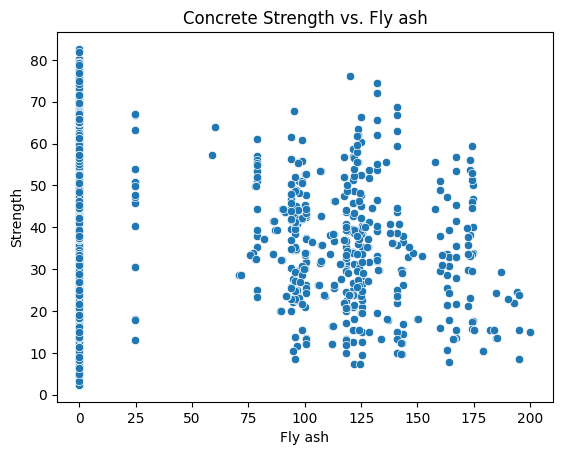

In [24]:
ax = sns.scatterplot(x="Fly Ash", y="Strength", data=data)
ax.set_title("Concrete Strength vs. Fly ash")
ax.set_xlabel("Fly ash");

**Adding color as a third dimension**

we conclude that the strength of cement is the best in Age 56-120

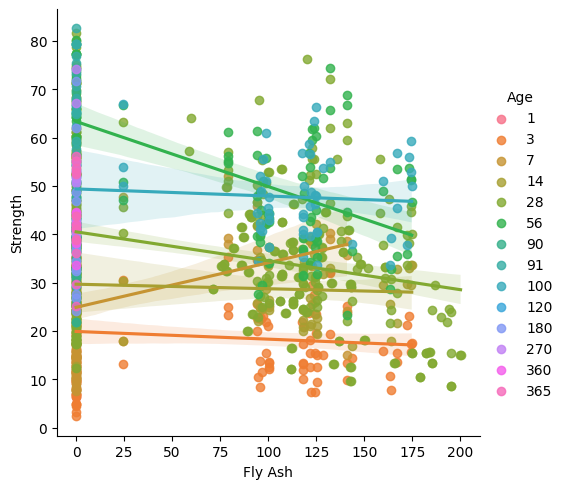

In [27]:
sns.lmplot(x="Fly Ash", y="Strength", hue="Age", data=data);

**Corrleation matrix**

A correlation matrix is a handy way to calculate the pairwise correlation coefficients between two or more (numeric) variables. The Pandas data frame has this functionality built-in to its corr() method, which I have wrapped inside the round() method to keep things tidy.



In [28]:
cormat = data.corr()
round(cormat,2)

,Cement,Slag,Fly Ash,Water,Super plasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
Cement,1.00,-0.28,-0.40,-0.08,0.09,-0.11,-0.22,0.08,0.50
Slag,-0.28,1.00,-0.32,0.11,0.04,-0.28,-0.28,-0.04,0.13
Fly Ash,-0.40,-0.32,1.00,-0.26,0.38,-0.01,0.08,-0.15,-0.11
Water,-0.08,0.11,-0.26,1.00,-0.66,-0.18,-0.45,0.28,-0.29
Super plasticizer,0.09,0.04,0.38,-0.66,1.00,-0.27,0.22,-0.19,0.37
Coarse Aggregate,-0.11,-0.28,-0.01,-0.18,-0.27,1.00,-0.18,-0.00,-0.16
Fine Aggregate,-0.22,-0.28,0.08,-0.45,0.22,-0.18,1.00,-0.16,-0.17
Age,0.08,-0.04,-0.15,0.28,-0.19,-0.00,-0.16,1.00,0.33
Strength,0.50,0.13,-0.11,-0.29,0.37,-0.16,-0.17,0.33,1.00


**Correlation matrix to heat map**

Python, and its libraries, make lots of things easy. For example, once the correlation matrix is defined , it can be passed to Seaborn’s heatmap() method to create a heatmap (or headgrid). The basic idea of heatmaps is that they replace numbers with colors of varying shades, as indicated by the scale on the right. Cells that are lighter have higher values of r. This type of visualization can make it much easier to spot linear relationships between variables than a table of numbers. For example, if I focus on the “Strength” column, I immediately see that “Cement” and “FlyAsh” have the largest positive correlations whereas “Slag” has the large negative correlation.

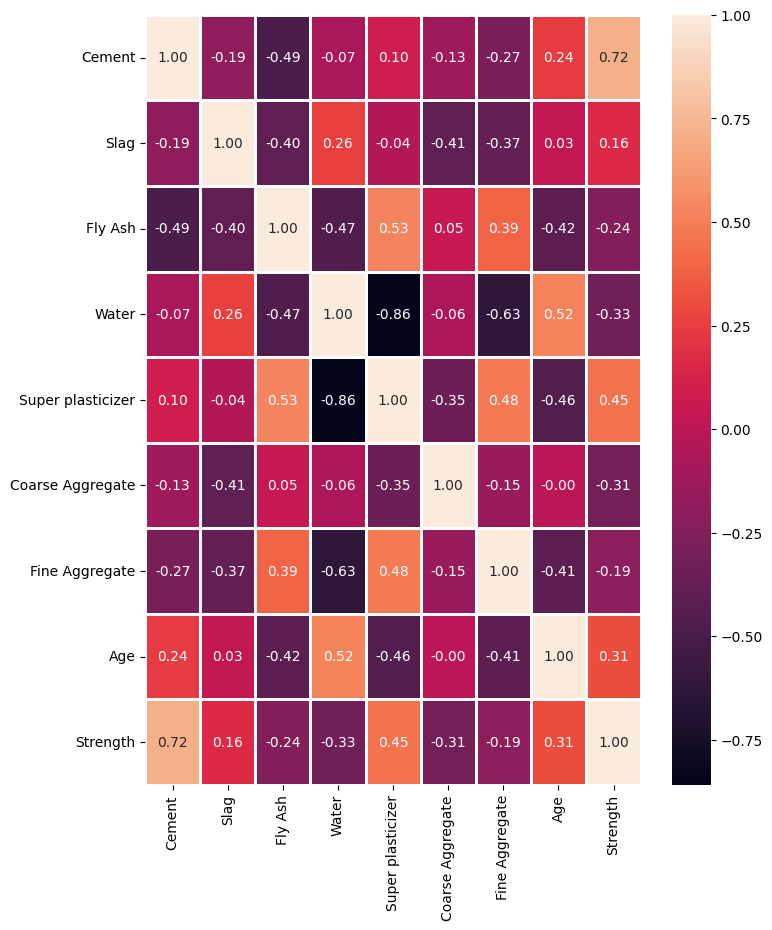

In [65]:
plt.figure(figsize = (8, 10))
sns.heatmap(cormat.corr(), annot = True, fmt = '0.2f', annot_kws = {'size' : 10}, linewidth = 2, linecolor = 'white')
plt.show()

**Preparing the data**

Define Y and X matrices

and add a constant column to the X matrix

In [33]:
import statsmodels.api as sm
Y = data['Strength']
X = data['Fly Ash']
X.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Fly Ash, dtype: float64

In [34]:
X = sm.add_constant(X)
X.head()

,const,Fly Ash
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0


**Running the model**



In [35]:
model = sm.OLS(Y, X, missing='drop')
model_result = model.fit()
model_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Strength   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     11.63
Date:                Sat, 06 Apr 2024   Prob (F-statistic):           0.000675
Time:                        09:09:59   Log-Likelihood:                -4355.4
No. Observations:                1030   AIC:                             8715.
Df Residuals:                    1028   BIC:                             8725.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         37.3139      0.679     54.978      0.000      35.982      38.646
Fly Ash       -0.0276      0.008     -3.410      0.001      -0.043      -0.012
==============================================================================
Omnibus:                       29.013   Durbin-Watson:                   0.848
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.218
Skew:                           0.351   Prob(JB):                     1.23e-06
Kurtosis:                       2.625   Cond. No.                         110.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

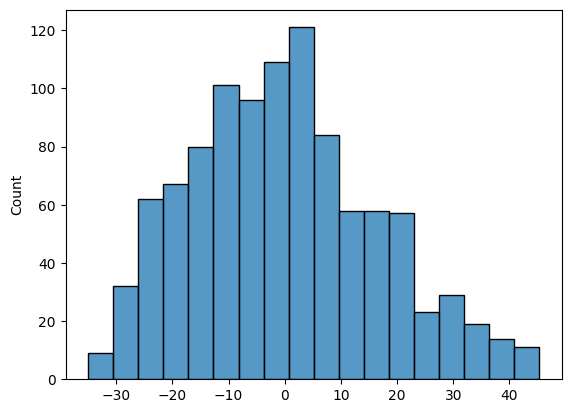

In [36]:
sns.histplot(model_result.resid);

<ipython-input-68-73949055c77d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model_result.resid)


<Axes: ylabel='Density'>

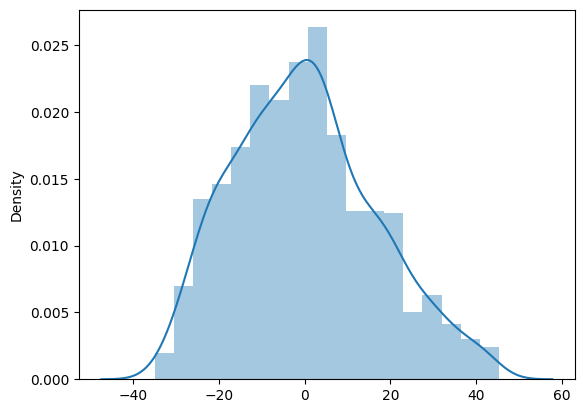

In [68]:
sns.distplot(model_result.resid)

**Q-Q Plot**

When the quantiles of two variables are plotted against each other, then the plot obtained is known as quantile – quantile plot or qqplot. This plot provides a summary of whether the distributions of two variables are similar or not with respect to the locations.

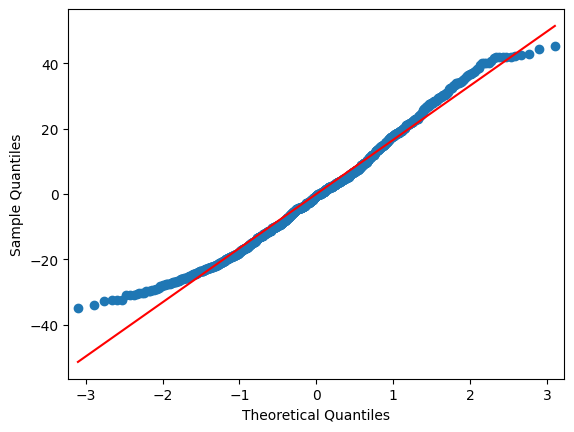

In [42]:
sm.qqplot(model_result.resid, line='s');


**Fit Plot**

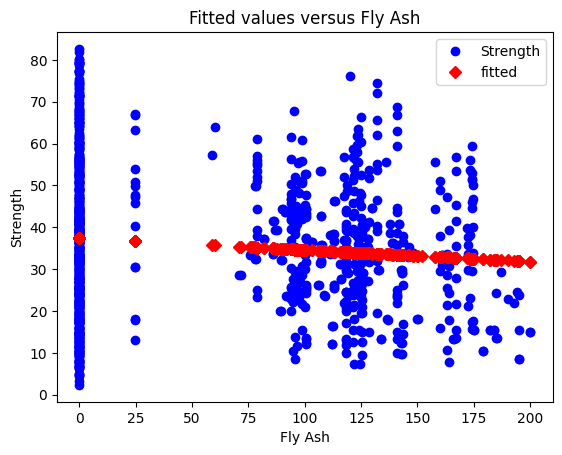

In [43]:
sm.graphics.plot_fit(model_result,1, vlines=False);